In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, binned_statistic
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from ratEphysFunctions import *
import scipy.io as sio
from scipy.optimize import curve_fit

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
np.random.seed(0)

In [2]:
session_table = sio.loadmat('mats/SGD_session_table_target.mat')['SGD_table']

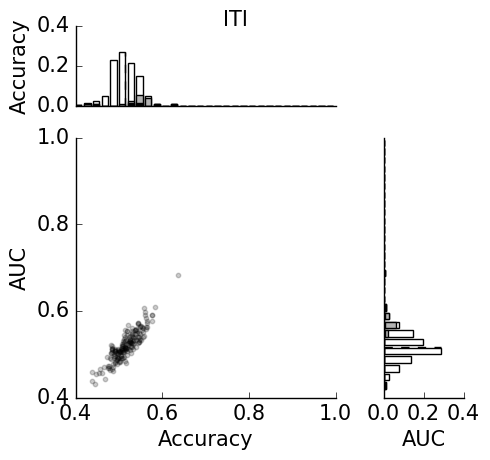

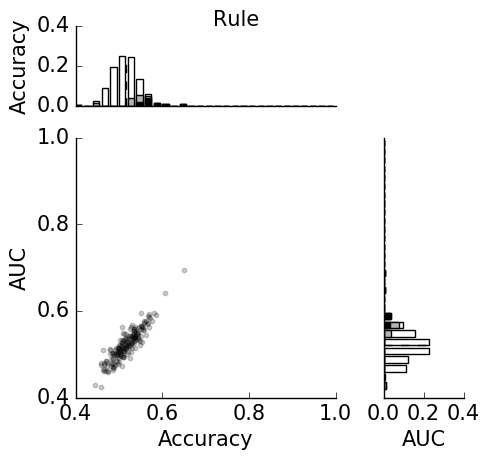

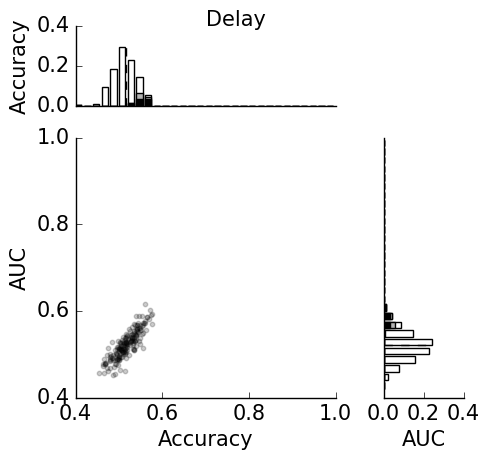

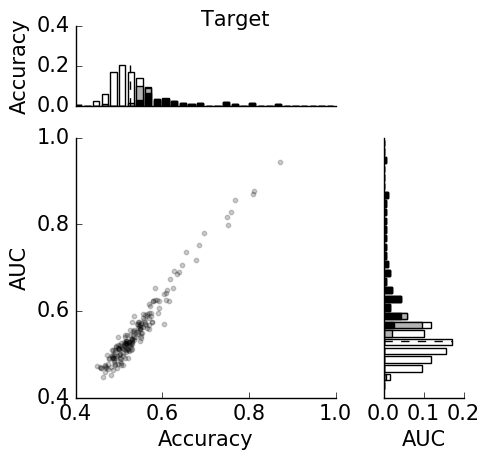

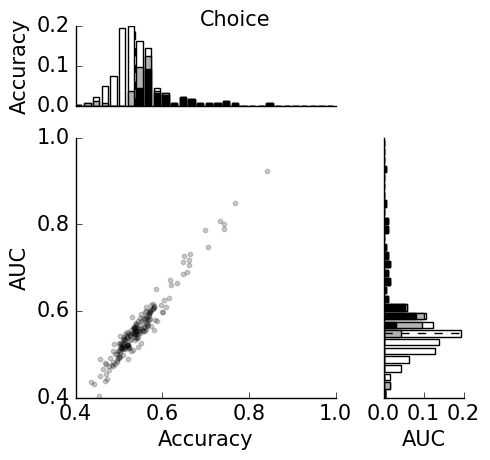

In [8]:
p_values = session_table[:,-2]
auc = session_table[:,-3]
accuracy = session_table[:,-4]
time_steps = ['ITI','Rule','Delay','Target','Choice']
for t in range(5):
    # Unknown bug: don't use loop to generate pdf! Otherwise the plots will overlap. 
    this_step = session_table[:,1]==t
    filename = "figures/AUC_scatter_histogram_target_"+time_steps[t]+".pdf"
    AUC_scatter_histogram(accuracy[this_step],auc[this_step],p_values[this_step],time_steps[t], 
                          filename = None)

In [2]:
single_AUC_p = sio.loadmat('mats/single_AUC_p.mat')['single_AUC_p'] #ITI_AUC, ITI_p, ...., choice_AUC, choice_p
single_AUC_p_target = sio.loadmat('mats/single_target_AUC_p.mat')['single_target_AUC_p'] #ITI_AUC, ITI_p, ...., choice_AUC, choice_p
pro_selective = load_weights("pkls/pro_selective-0.85.pkl")
anti_selective = load_weights("pkls/anti_selective-0.85.pkl")
left_selective = load_weights("pkls/left_selective-0.85.pkl")
right_selective = load_weights("pkls/right_selective-0.85.pkl")

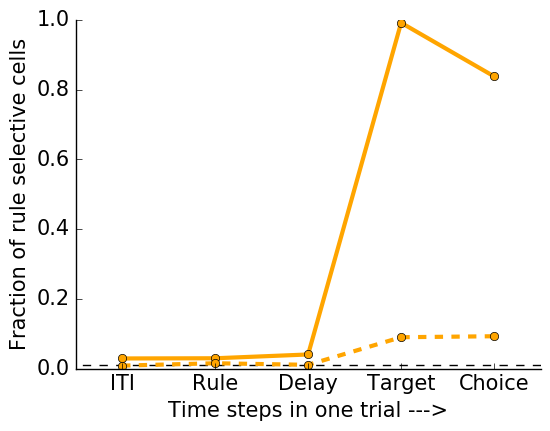

In [3]:
fraction_significant_cell(single_AUC_p_target, right_selective, left_selective)

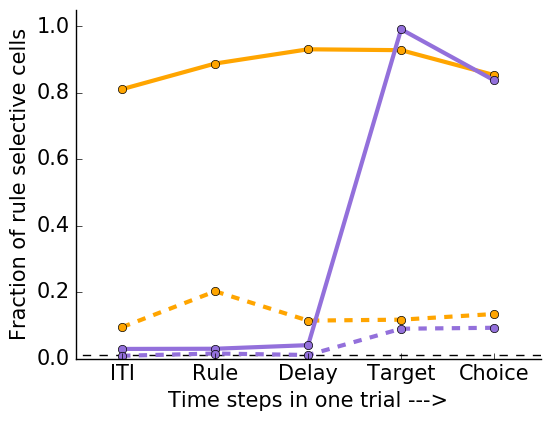

In [4]:
fraction_significant_cell_combined(single_AUC_p, single_AUC_p_target, pro_selective, 
    anti_selective, right_selective, left_selective, filename = "figures/selective_neurons.pdf")

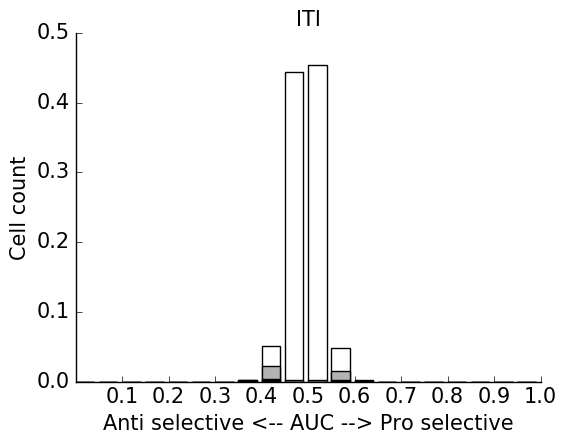

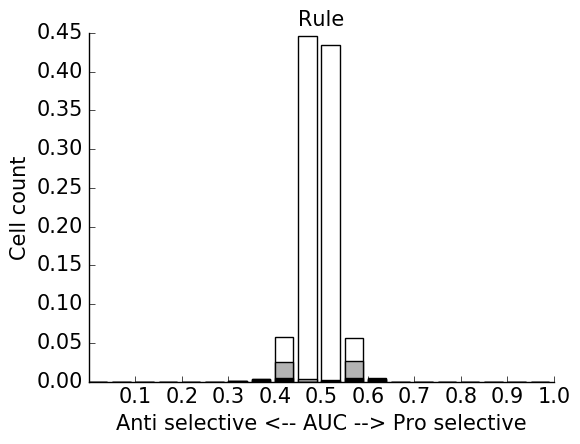

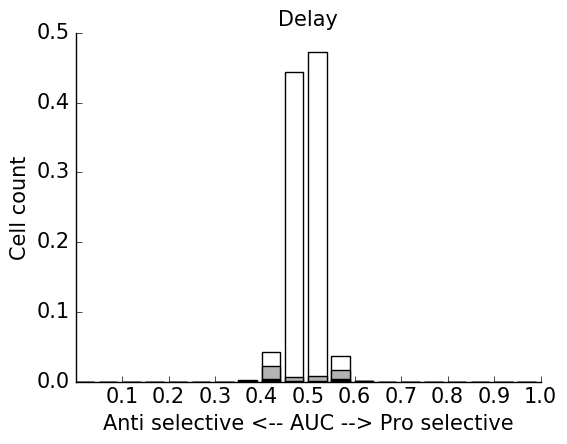

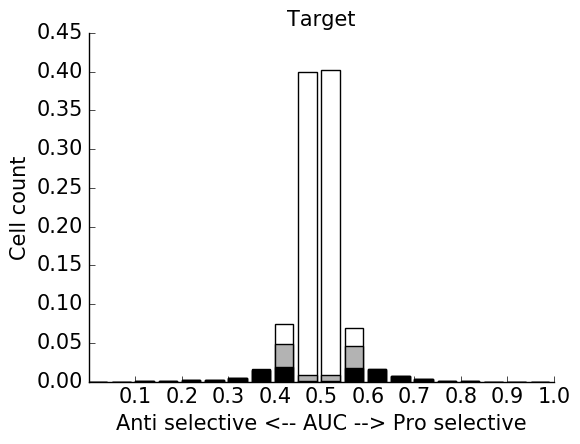

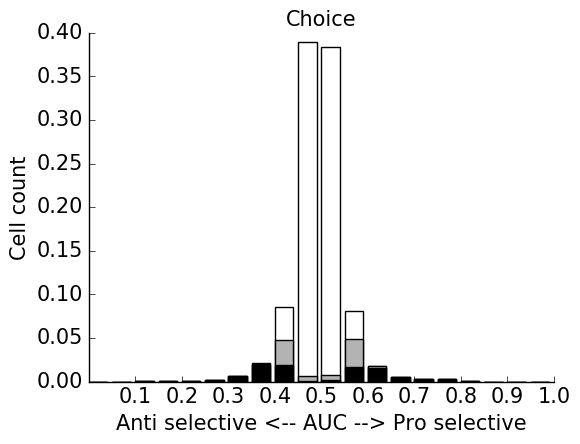

In [20]:
single_neuron_AUC(single_AUC_p_target,save=True, target=True)

In [5]:
auc = load_weights("pkls/auc_target-0.85.pkl")
significant = load_weights("pkls/auc_significant_target-0.85.pkl")
CellIndexPerSession = sio.loadmat('mats/CellIndexPerSession.mat')['CellIndexPerSession'][0,:]
flip_fraction_RNN = flip_neurons_RNN(auc, significant)
fraction_flip_per_session = flip_neurons(single_AUC_p, CellIndexPerSession, threshold = 0.01)

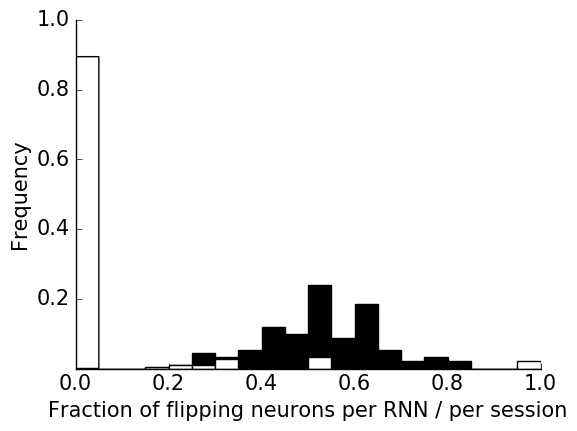

In [6]:
AUC_flip_histogram(flip_fraction_RNN, fraction_flip_per_session, filename = "figures/target_flipping_combine.pdf")

In [25]:
fitted_table = sio.loadmat('mats/SGD_table_target_normalized_fitted.mat')['SGD_matrix']
# sessid, time_step, score, pro, right, switch, hit, accuracy, same_score, ratindex, fit

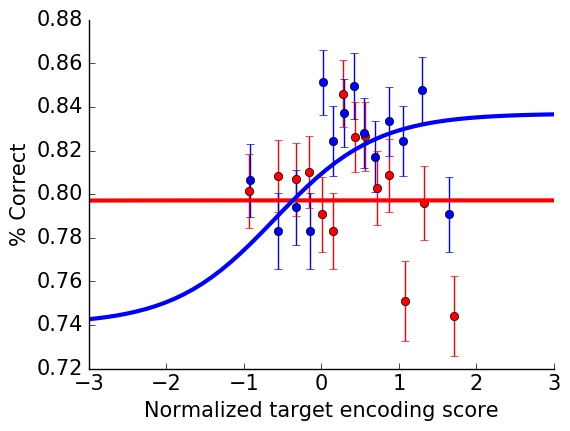

In [26]:
plot_bins(fitted_table, bins=15, bins_fit=50, target=True,filename = "figures/ratNormalizedTargetFitted.pdf")

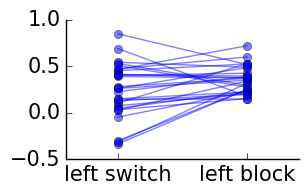

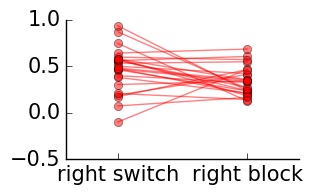

In [28]:
encoding_score_parallel_plot(fitted_table, "left", time_step=None,minimum_trial = 4, filename = "figures/ratLeftScore.pdf")
encoding_score_parallel_plot(fitted_table, "right", time_step=None,minimum_trial = 4, filename = "figures/ratRightScore.pdf")